## WQD7006 Machine Learning for Data Science
## Project Title: The Forecasting Number of Recovered Covid-19 Pandemic Cases across the Globe.

---



#### Name: Fatimah binti Mohd Nizam
#### Matric No: 17218825

All the libraries needed for the data analytics are imported below

In [ ]:
# For basic operations and visualizations
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For machine learning algorithms 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures

# For statistical analysis
from sklearn.metrics import mean_squared_error, r2_score

std=StandardScaler()

The dataset are loaded into a variable called covid

In [ ]:
covid=pd.read_csv("covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


1. Data Understanding

In [ ]:
print("Size/Shape of the dataset: ", covid.shape)
print()
print("Checking for null values:\n", covid.isnull().sum())
print()
print("Checking Data-type of each column:\n", covid.dtypes)

Size/Shape of the dataset:  (60953, 8)

Checking for null values:
 SNo                    0
ObservationDate        0
Province/State     22747
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

Checking Data-type of each column:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [ ]:
#Another option to check
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60953 entries, 0 to 60952
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              60953 non-null  int64  
 1   ObservationDate  60953 non-null  object 
 2   Province/State   38206 non-null  object 
 3   Country/Region   60953 non-null  object 
 4   Last Update      60953 non-null  object 
 5   Confirmed        60953 non-null  float64
 6   Deaths           60953 non-null  float64
 7   Recovered        60953 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 3.7+ MB


2. Data Wrangling / Data Cleaning

In [ ]:
#Dropping column SNo that is no use for this analysis
covid.drop(["SNo"],1,inplace=True)


In [ ]:
#Dropping the column province/state because of the missing values and there is no need for it. 
#we will analyze by country.
covid.drop(["Province/State"],1,inplace=True)


In [ ]:
covid

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...
60948,07/10/2020,Peru,2020-07-11 04:34:26,3493.0,93.0,0.0
60949,07/10/2020,Mainland China,2020-07-11 04:34:26,68135.0,4512.0,63623.0
60950,07/10/2020,Colombia,2020-07-11 04:34:26,403.0,17.0,285.0
60951,07/10/2020,Mainland China,2020-07-11 04:34:26,1019.0,4.0,1015.0


In [ ]:
#converting the "Observation Date" into DataTime format
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])
covid

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...
60948,2020-07-10,Peru,2020-07-11 04:34:26,3493.0,93.0,0.0
60949,2020-07-10,Mainland China,2020-07-11 04:34:26,68135.0,4512.0,63623.0
60950,2020-07-10,Colombia,2020-07-11 04:34:26,403.0,17.0,285.0
60951,2020-07-10,Mainland China,2020-07-11 04:34:26,1019.0,4.0,1015.0


### 3. Exploratory Data Analysis

In [ ]:
# find the mean, max and min of the data for confirmed, deaths and recovered cases for the whole world
covid.describe()

,Confirmed,Deaths,Recovered
count,60953.000000,60953.000000,60953.000000
mean,9428.436533,533.974308,4118.816039
std,29602.469555,2473.005368,23049.912014
min,0.000000,0.000000,0.000000
25%,89.000000,1.000000,0.000000
50%,855.000000,13.000000,103.000000
75%,4658.000000,146.000000,1220.000000
max,405843.000000,41128.000000,969111.000000


In [ ]:
#group according to countries and observation date into grouped_countries variable
grouped_countries = covid.groupby(["Country/Region","ObservationDate"])
grouped_countries

In [ ]:
#aggregate the sum of Recovered, Deaths and Confirmed cases 
grouped_countries = grouped_countries.agg({"Confirmed":'sum', "Recovered":'sum', "Deaths":'sum'})

In [ ]:
#To investigate the amount of active cases
grouped_countries["Active_Cases"] = grouped_countries["Confirmed"] - grouped_countries["Recovered"] - grouped_countries["Deaths"]

### 4. Datewise Analysis : The number of covid cases over time 

- Analyze the number of cases in the world per Month

In [ ]:
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum', "Recovered":'sum', "Deaths":'sum'})
datewise["Active_Cases"] = datewise["Confirmed"] - datewise["Recovered"] - datewise["Deaths"]

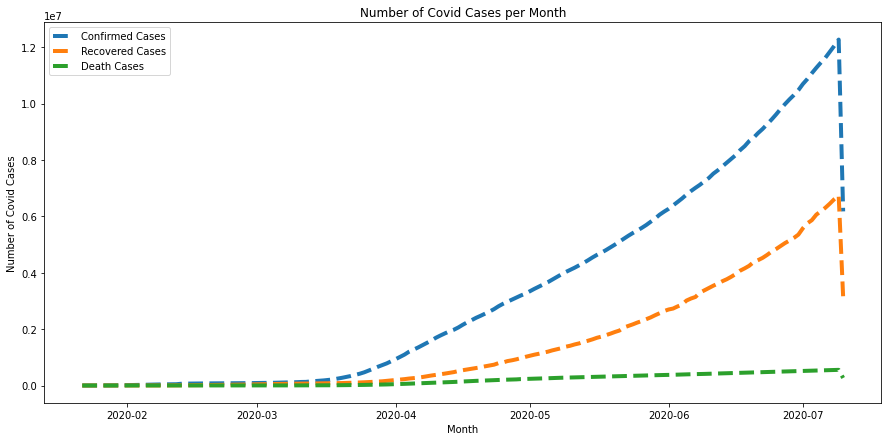

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(datewise.index,datewise["Confirmed"], linewidth=4, linestyle='dashed')
plt.plot(datewise.index,datewise["Recovered"], linewidth=4, linestyle='dashed')
plt.plot(datewise.index,datewise["Deaths"], linewidth=4, linestyle='dashed')
plt.legend(['Confirmed Cases', 'Recovered Cases', 'Death Cases'])
plt.title('Number of Covid Cases per Month')
plt.xlabel('Month')
plt.ylabel('Number of Covid Cases')
plt.show()

In [ ]:
# Another way to do it
import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"], 
                         mode='lines+markers', name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"], 
                         mode='lines+markers', name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"], 
                         mode='lines+markers', name='Deaths Cases'))
fig.update_layout(title="The number of Covid cases per Month",
                 xaxis_title="Month", yaxis_title="Number of Covid cases")
fig.show()

In [ ]:
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Active_Cases"], 
                         mode='lines+markers', name='Active Cases'))
fig.update_layout(title="The number of Covid cases per Month",
                 xaxis_title="Month", yaxis_title="Number of Covid cases")
fig.show()

In [ ]:
datewise

,Confirmed,Recovered,Deaths,Active_Cases
ObservationDate,,,,
2020-01-22,555.0,28.0,17.0,510.0
2020-01-23,653.0,30.0,18.0,605.0
2020-01-24,941.0,36.0,26.0,879.0
2020-01-25,1438.0,39.0,42.0,1357.0
2020-01-26,2118.0,52.0,56.0,2010.0
...,...,...,...,...
2020-07-06,11620700.0,6302095.0,538084.0,4780521.0
2020-07-07,11830769.0,6447124.0,544187.0,4839458.0
2020-07-08,12043204.0,6605139.0,549496.0,4888569.0


We can conclude that the number of active cases around the world are still increasing throught time.

- Average increase of mortality and recovery rate everyday

mortality rate = (death cases/confirmed cases)*100 <br>
recovery rate = (recovered cases/confirmed cases)*100

In [ ]:
datewise["Mortality Rate"] =(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"] = (datewise["Recovered"]/datewise["Confirmed"])*100

print("The average Mortality Rate: ", datewise["Mortality Rate"].mean())
print("The average Recovery Rate: ", datewise["Recovery Rate"].mean())

The average Mortality Rate:  4.870922978062395
The average Recovery Rate:  32.98374256883049


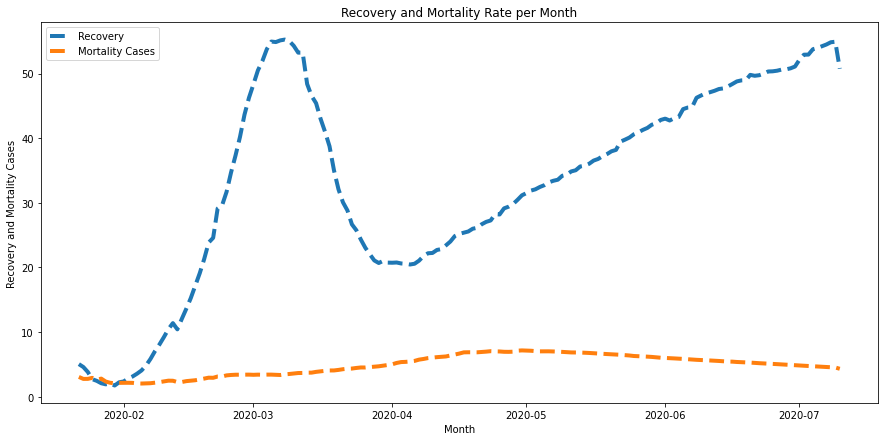

In [ ]:
#plotting the recovery and mortality rate

plt.figure(figsize=(15,7))
plt.plot(datewise.index,datewise["Recovery Rate"], linewidth=4, linestyle='dashed')
plt.plot(datewise.index,datewise["Mortality Rate"], linewidth=4, linestyle='dashed')
plt.legend(['Recovery', 'Mortality Cases'])
plt.title('Recovery and Mortality Rate per Month')
plt.xlabel('Month')
plt.ylabel('Recovery and Mortality Cases')
plt.show()

### 5. Countrywise Analysis: The number of Covid Cases per Country

In [ ]:
#calculating the Recovery and Mortality Rate per Country

countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',
                                                                                                             "Recovered":'sum',
                                                                                                             "Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)

In [ ]:
countrywise["Mortality_Cases"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery_Cases"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Top 10 Countries with High Number of Covid Cases in the last 24 hours

In [ ]:
ConfirmedList = []
RecoveredList = []
DeathsList = []

#To obtain the latest update  -> today cases - yesterday cases
for country in countrywise.index:
    ConfirmedList.append((grouped_countries.loc[country].iloc[-1] - grouped_countries.loc[country].iloc[-2])
                        ["Confirmed"])
    RecoveredList.append((grouped_countries.loc[country].iloc[-1] - grouped_countries.loc[country].iloc[-2])
                        ["Recovered"])
    DeathsList.append((grouped_countries.loc[country].iloc[-1] - grouped_countries.loc[country].iloc[-2])
                        ["Deaths"])

In [ ]:
CountriesList = pd.DataFrame(list(zip(countrywise.index, ConfirmedList, RecoveredList, DeathsList)),
                            columns=["Country Name", "Last 24 Hours Confirmed",
                                    "Last 24 Hours Recovered",
                                    "Last 24 Hours Deaths"])
CountriesList.head(10)

,Country Name,Last 24 Hours Confirmed,Last 24 Hours Recovered,Last 24 Hours Deaths
0,US,-2147489.0,-969111.0,-108575.0
1,Brazil,-1183942.0,-752783.0,-51253.0
2,Iran,2262.0,2839.0,142.0
3,South Africa,12348.0,5171.0,140.0
4,UK,-39933.0,-333.0,-4563.0
5,India,-561384.0,-329229.0,-15508.0
6,Saudi Arabia,3159.0,1930.0,51.0
7,Turkey,1003.0,1493.0,23.0
8,France,-2950.0,-2897.0,-33.0
9,Bangladesh,2949.0,1862.0,37.0


In [ ]:
#Top 30 Covid Cases in the last 24 hours
Top_30Confirmed = CountriesList.sort_values(["Last 24 Hours Confirmed"], ascending=False).head(30)
Top_30Recovered = CountriesList.sort_values(["Last 24 Hours Recovered"], ascending=False).head(30)
Top_30Deaths = CountriesList.sort_values(["Last 24 Hours Deaths"], ascending=False).head(30)
CountryNames = CountriesList["Country Name"]

Text(0.5, 1.0, 'Top 30 Countries with Highest Number of Death Cases in Last 24 Hours')

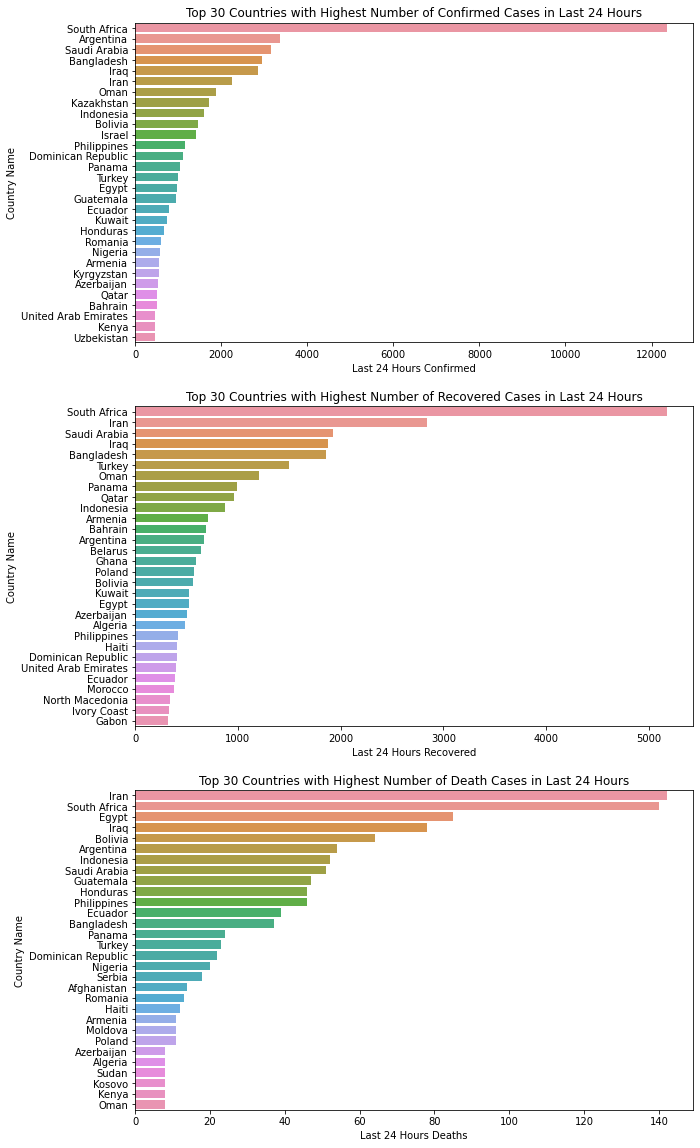

In [ ]:
#Horizontal bar
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,20))
sns.barplot(x=Top_30Confirmed["Last 24 Hours Confirmed"],y=Top_30Confirmed["Country Name"],ax=ax1)
ax1.set_title("Top 30 Countries with Highest Number of Confirmed Cases in Last 24 Hours")
sns.barplot(x=Top_30Recovered["Last 24 Hours Recovered"],y=Top_30Recovered["Country Name"],ax=ax2)
ax2.set_title("Top 30 Countries with Highest Number of Recovered Cases in Last 24 Hours")
sns.barplot(x=Top_30Deaths["Last 24 Hours Deaths"],y=Top_30Deaths["Country Name"],ax=ax3)
ax3.set_title("Top 30 Countries with Highest Number of Death Cases in Last 24 Hours")

In [ ]:
countrywise.head(10)

,Confirmed,Recovered,Deaths,Mortality_Cases,Recovery_Cases
Country/Region,,,,,
US,971093.0,0.0,24722.0,2.545791,0.000000
Brazil,571837.0,418664.0,17931.0,3.135684,73.213870
Iran,252720.0,215015.0,12447.0,4.925214,85.080326
South Africa,250687.0,118232.0,3860.0,1.539769,47.163196
UK,249221.0,1045.0,40124.0,16.099767,0.419307
India,232418.0,166284.0,6096.0,2.622861,71.545233
Saudi Arabia,226486.0,163026.0,2151.0,0.949728,71.980608
Turkey,210965.0,191883.0,5323.0,2.523167,90.954898
France,204406.0,75398.0,29949.0,14.651723,36.886393


### 6. Data Modelling 

#### I. Linear Regression to predict Number of Recovered Cases

we will predict the number of Recovered cases due to Covid-19 pandemic.

In [ ]:
datewise.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 171 entries, 2020-01-22 to 2020-07-10
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Confirmed       171 non-null    float64
 1   Recovered       171 non-null    float64
 2   Deaths          171 non-null    float64
 3   Active_Cases    171 non-null    float64
 4   Mortality Rate  171 non-null    float64
 5   Recovery Rate   171 non-null    float64
dtypes: float64(6)
memory usage: 9.4 KB


In [ ]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [ ]:
train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [ ]:
model=LinearRegression(normalize=True)

In [ ]:
model.fit(np.array(train["Days Since"]).reshape(-1,1),np.array(train["Recovered"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction_valid_linreg=model.predict(np.array(valid["Days Since"]).reshape(-1,1))

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid["Recovered"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid["Recovered"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  2402041.438397067


In [ ]:
#explain what is mean squared error

In [ ]:
plt.figure(figsize=(11,6))
prediction_linreg=model.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Recovered Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

It is shown that the Covid-19 Deaths Cases is 
not linear.

#### 2. Polynomial Regression to predict Number of Deaths Cases

In [ ]:
train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]

In [ ]:
poly = PolynomialFeatures(degree = 8) 

In [ ]:
train_poly=poly.fit_transform(np.array(train["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid["Days Since"]).reshape(-1,1))
y=train["Recovered"]

In [ ]:
model=LinearRegression(normalize=True)
model.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction_poly=model.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid["Recovered"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  1090114.218156747


In [ ]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=model.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Recovered Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>


#### 3. Time Series Forecasting: Holt's Linear Model to predict Number of Recovered Cases

In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()


In [ ]:
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
holt=Holt(np.asarray(model_train["Recovered"])).fit(smoothing_level=0.4, 
                                                    smoothing_slope=0.4,optimized=False)     

In [ ]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Recovered"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Recovered"],
                                                                                y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  1170724.9761738346


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Recovered"],
                    mode='lines+markers',name="Validation Data for Recovered Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Recovered Cases",))
fig.update_layout(title="Recovered Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


#### 4. Time Series Forecasting: Holt's Winter Model to predict Number of Deaths Cases

In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
es=ExponentialSmoothing(np.asarray(model_train['Recovered']),
                        seasonal_periods=14,trend='add', seasonal='mul').fit()


In [ ]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Recovered"],y_pred["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ",
      np.sqrt(mean_squared_error(y_pred["Recovered"],y_pred["Holt's Winter Model"])))

Root Mean Square Error for Holt's Winter Model:  1138567.8326810487


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Recovered"],
                    mode='lines+markers',name="Validation Data for Recovered Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt\'s Winter Model"],
                    mode='lines+markers',name="Prediction of Recovered Cases",))
fig.update_layout(title="Recovered Cases Holt's Winter Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#### 5. Time Series Forecasting: ARIMA Model to predict Number of Confirmed Cases

In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
!pip3 install pyramid-arima

     |████████████████████████████████| 604kB 8.5MB/s 


In [ ]:
from pyramid.arima import auto_arima

model_arima= auto_arima(model_train["Recovered"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Recovered"])

Fit ARIMA: order=(1, 2, 1); AIC=3559.178, BIC=3571.479, Fit time=0.196 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3555.846, BIC=3571.222, Fit time=0.185 seconds
Fit ARIMA: order=(1, 2, 3); AIC=3552.244, BIC=3570.695, Fit time=0.238 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3557.782, BIC=3573.158, Fit time=0.163 seconds
Fit ARIMA: order=(2, 2, 2); AIC=3552.445, BIC=3570.896, Fit time=0.190 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3558.468, BIC=3579.994, Fit time=0.332 seconds
Fit ARIMA: order=(3, 2, 1); AIC=3559.488, BIC=3577.939, Fit time=0.152 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3554.404, BIC=3575.930, Fit time=0.190 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3645.796, BIC=3670.397, Fit time=0.690 seconds
Total fit time: 2.344 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [ ]:
prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid["Recovered"],prediction_arima)))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["Recovered"],prediction_arima)))

Root Mean Square Error for ARIMA Model:  1196612.5819942027


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Recovered"],
                    mode='lines+markers',name="Validation Data for Recovered Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Recovered Cases",))
fig.update_layout(title="Recovered Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Table for machine learning algorithms comparison


In [ ]:
new_prediction_poly=[]
holt_new_date=[]
holt_new_prediction=[]
holt_winter_new_prediction=[]
ARIMA_model_new_prediction=[]
new_date=[]

In [ ]:
for i in range(1,18):
    new_date_poly=poly.fit_transform(np.array(datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(model.predict(new_date_poly)[0])

In [ ]:
for i in range(1,18):
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])


In [ ]:
for i in range(1,18):
    holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])

In [ ]:
for i in range(1,18):
    ARIMA_model_new_prediction.append(model_arima.predict(len(valid)+i)[-1])

In [ ]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_prediction_poly, holt_new_prediction, holt_winter_new_prediction, ARIMA_model_new_prediction),
                               columns=["Polynonmial Regression Prediction","Holt's Linear Model Prediction", "Holt's Winter Model Prediction", "ARIMA Model Prediction" ])
model_predictions.head()

,Polynonmial Regression Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,ARIMA Model Prediction
0,6258721.189088,6723190.671640,6525597.807162,6838185.081397
1,6304165.889153,6845593.083812,6609044.670122,6971717.191210
2,6340331.546095,6967995.495985,6700081.936164,7105408.843658
3,6366234.655352,7090397.908157,6811198.065861,7240300.028497
4,6380826.659293,7212800.320329,6868476.238256,7375732.274046
